# Project: Investigate a Dataset 

# Introduction
This is a dataset of appointments made to public hostipitals in Vitoria, Brazil. There are patients who showed up to the clinic and those that didn't show up. We are trying to investigate what are the factors that determine whether a patient shows up at the scheduled appointment.
The dataset can be found at the following link
https://www.kaggle.com/joniarroba/noshowappointments

## Question posed
1. How does having a scholarship determine whether the patient shows up?
2. Do conditions like diabetes, hypertension, alcoholism, handicap influence the no-show?
3. Does sending an SMS help
4. Does the age and gender play any part in deciding to go?
5. Does the difference between scheduling day and appointment day determine no-show?
6. Is no-show influenced by the neighborhood of the patient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(filename)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling

#### My process of data wrangling data is as follows
1. Check for missing values
2. Convert date fields to the correct dtype
3. Turn No-show into a binary dtype
4. Remove the unwanted fields of PatientID and AppointmentID
5. Create a field 'DaysAhead' using the difference between scheduled date and appointment date
6. Group age into bins

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isna().sum().sum()

0

No missing values here

In [5]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [6]:
df['No-show'] = df['No-show'].apply(lambda x: True if x == 'Yes' else False)

In [7]:
columns_to_drop = ['PatientId', 'AppointmentID']
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df['DaysAhead'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [9]:
df['AgeGroup'] = pd.cut(df['Age'], np.arange(0, 130, 10))

## Exploratory Data Analysis

### Distrubution of No Show 

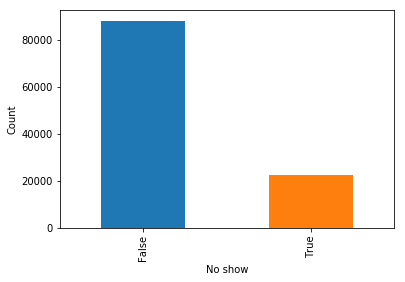

In [10]:
df['No-show'].value_counts().plot.bar()
plt.xlabel('No show')
plt.ylabel('Count');

In [11]:
df['No-show'].mean()

0.20193255946510807

### How the binary variables influence No-show fraction?

In [12]:
binary_variables = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

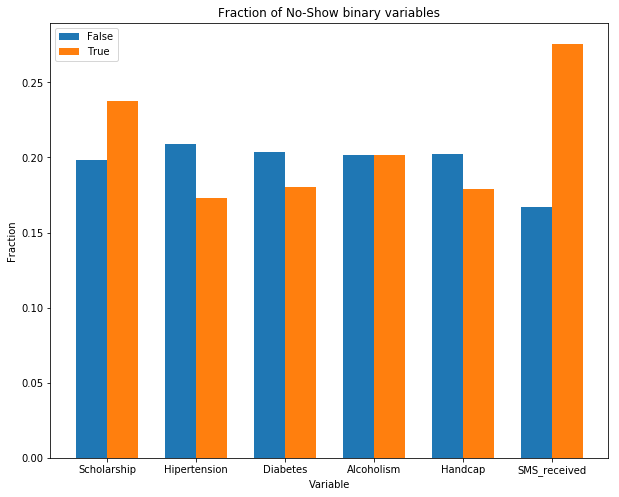

In [13]:
true_fractions = []
false_fractions = []
for variable in binary_variables:
    fractions = df.groupby(variable)['No-show'].mean()
    true_fractions.append(fractions[1])
    false_fractions.append(fractions[0])

width = 0.35
x = np.arange(len(binary_variables))

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x-width/2, false_fractions, width, label='False')
ax.bar(x+width/2, true_fractions, width, label='True')
ax.set_xticks(x)
ax.set_xticklabels(binary_variables)
ax.legend()
ax.set_xlabel('Variable')
ax.set_ylabel('Fraction')
plt.title('Fraction of No-Show binary variables');

1. When the patient has scholorship, the chance of showing up is less than the change of not showing up
2. When the patient sufferes from hypertension, diabetes, or handicap the the change of showing up is more than not showing up. (Alcoholism is not affecting)
3. A patient who receives an SMS alert has less chance of showing up, surprisingly

### How the difference between scheduled day and appointment day affect showing up?

In [14]:
(df['AppointmentDay'].dt.hour == 0).mean()

1.0

Appointment day is day only and no time

In [15]:
(df['ScheduledDay'].dt.hour).mean()

10.774516633944646

In [16]:
df['DaysAhead'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: DaysAhead, dtype: float64

In [17]:
df['DaysAhead'] = pd.cut(df['DaysAhead'], np.arange(0, 200, 20))

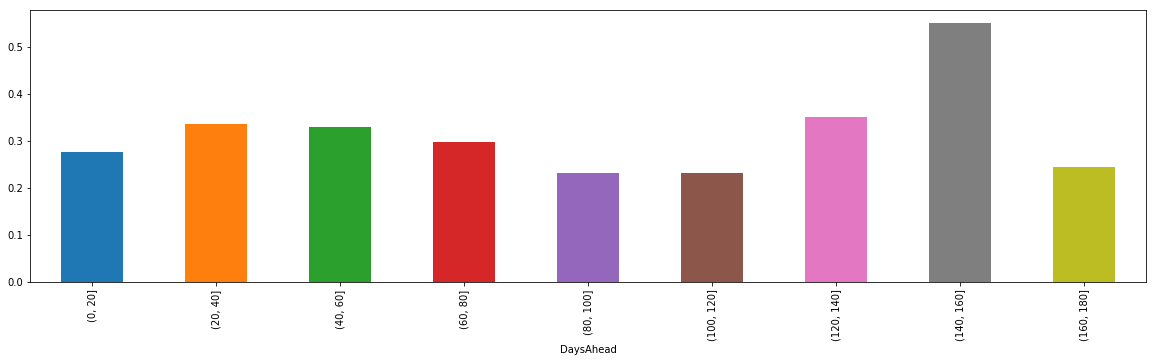

In [18]:
df.groupby('DaysAhead')['No-show'].mean().plot.bar(figsize=(20,5))

### Does Neighborhood provide useful information?

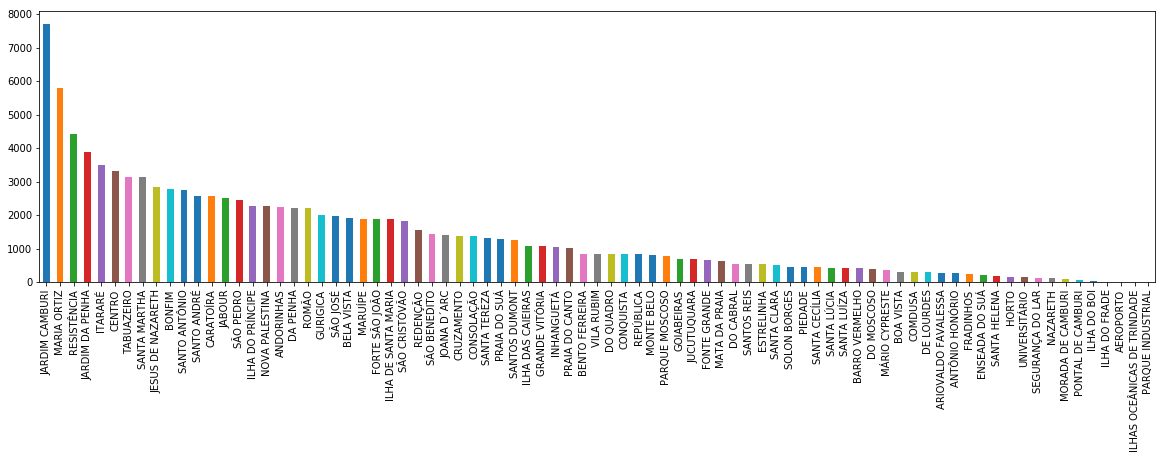

In [19]:
df['Neighbourhood'].value_counts().plot.bar(figsize=(20, 5));

Can't use to infer anything because there are too many neighborhoods and some have too few values

### How much does gender affect?

In [20]:
df.groupby('Gender')['No-show'].mean()

Gender
F    0.203146
M    0.199679
Name: No-show, dtype: float64

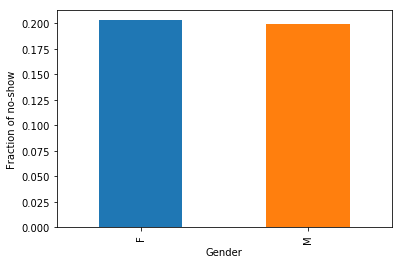

In [21]:
df.groupby('Gender')['No-show'].mean().plot.bar()
plt.ylabel('Fraction of no-show');

Gender doesn't affect much whether the person shows up or not. Males have slightly less chance of showing up than females

### How the age of the patient affect them showing up?

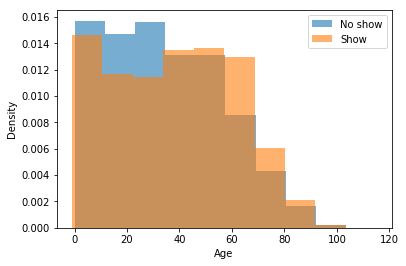

In [22]:
plt.hist(df[df['No-show'] == True]['Age'], density=True, label='No show', alpha=0.6)
plt.hist(df[df['No-show'] == False]['Age'], density=True, label='Show', alpha=0.6)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Density');

In [23]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [24]:
df['AgeGroup'].value_counts()

(50, 60]      15661
(0, 10]       15210
(30, 40]      15052
(40, 50]      14420
(20, 30]      13783
(10, 20]      13099
(60, 70]      11189
(70, 80]       5721
(80, 90]       2544
(90, 100]       301
(110, 120]        5
(100, 110]        2
Name: AgeGroup, dtype: int64

Text(0,0.5,'Fraction of No Show')

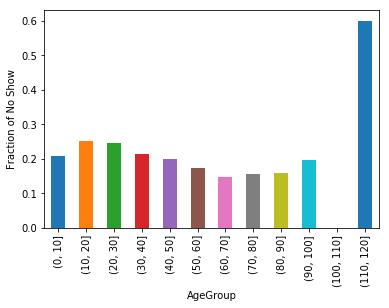

In [25]:
df.groupby('AgeGroup')['No-show'].mean().plot.bar();
plt.ylabel('Fraction of No Show')

Very old people have more chance of not showing up, but they could just be outliers

Young people have more chance of no show than older people

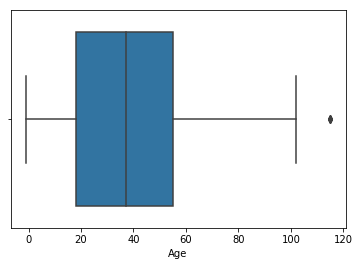

In [26]:
sns.boxplot(data=df, x='Age');

## Conclusions 

1. Patients suffering from hypertension, diabetes or handicap have less chance of no-show than those not suffering
2. Having scholarship makes the patient less likely to show up
3. Having received an SMS notification makes a big difference in showing up or not showing up. Those who receive an SMS notification show up less
4. Younger people have more chance of no show

### Limitations
1. Categorical variables mean not a lot of correlation can be found
2. The patients are dispropotionately distrubuted in neighborhoods. And there are too many neighborhoods and not enough information to group them

## References
N/A